---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>


<h1 align="center">Lecture 2 (Basic Text Pre-Processing)</h1>

<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-5-(Data-Acquisition)/Lec-5.4(Web-Scraping-using-Selenium-II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" width="900"  src="images/phase2.png"  > 

# Learning agenda of this notebook
1. **Text Cleaning**
    - Removing digits and words containing digits
    - Removing newline characters and extra spaces
    - Removing HTML tags
    - Removing URLs
    - Removing punctuations
    

2. **Basic Text Preprocessing**
    - Case folding
    - Expand contractions
    - Chat word treatment
    - Handle emojis
    - Spelling correction
    - Tokenization
    - Creating N-grams
    - Stop words Removal
 
 
3. **Advanced Preprocessing**
    - Stemming
    - Lemmatization
    - POS tagging
    - NER
    - Parsing
    - Coreference Resolution
    

4. **Text Pre-Processing on Tweets Dataset**

# Download and Install Required Libraries

In [1]:
import sys
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q --upgrade numpy pandas sklearn
!{sys.executable} -m pip install -q --upgrade nltk spacy gensim wordcloud textblob contractions clean-text unicode

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.
'C:\Program' is not recognized as an internal or external command,
operable program or batch file.
'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


# 1. Text Cleaning

## a. Removing Digits and Words Containing Digits 
- Sometimes it happens that words and digits combine are written in the text which creates a problem for machines to understand. Hence, we need to remove the words and digits which are combined like game57 or game5ts7.
- For such and many other tasks we normally use Regular Expressions.
- Watch  two videos on regular expressions:
    - https://www.youtube.com/watch?v=DhQ-kc6FPVk
    - https://www.youtube.com/watch?v=3J62z5aGTQc

- The **`re.sub(pattern, replacement_string, str)`** method return the string obtained by replacing the occurrences of `pattern` in `str` with the `replacement_string`. If the pattern isn’t found, the string is returned unchanged.

In [7]:
import re
mystr = "This is abc32 a abc32xyz string containing 32abc words  32 having digits"
re.sub('\w*\d\w*', '', mystr)

'This is  a  string containing  words   having digits'

In [1]:
import pandas as pd
import re

data = {
    'text': ["This is abc32 a abc32xyz string containing 32abc words", "Having digits in this sentence 123"],
    'label': [0, 1]
}

df = pd.DataFrame(data)
df.head()

,text,label
0,This is abc32 a abc32xyz string containing 32a...,0
1,Having digits in this sentence 123,1


In [2]:
# Function to remove words containing digits
def remove_words_with_digits(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

In [3]:
df['text'] = df['text'].apply(remove_words_with_digits)
df

,text,label
0,This is a string containing words,0
1,Having digits in this sentence,1


## b. Removing New Line Characters and Extra Spaces
- Most of the time text data contain extra spaces or while removing digits more than one space is left between the text.
- We can use Python's string and re module to perform this pre-processing task.

In [11]:
import re
mystr = "      This         is a       string  with   lots of   extra spaces      in beteween    words     ."
re.sub(' +', ' ', mystr)

' This is a string with lots of extra spaces in beteween words .'

In [12]:
mystr = "This is\na string\nwith lots of new\nline characters."
print("Original String:\n", mystr)
print("Preprocessed String:", re.sub('\n', ' ', mystr))

Original String:
 This is
a string
with lots of new
line characters.
Preprocessed String: This is a string with lots of new line characters.


## c. Removing HTML Tags
- Once you get data via scraping websites, your data might contain HTML tags, which are not required as such in the data. So we need to remove them.

In [13]:
import re
mystr = "<html> <head> An empty head. </head><body><p> This is so simple and fun. </p> </body> </html>"
print("Original String: ", mystr)
print("Preprocessed String: ", re.sub('<.*?>', '', mystr))

Original String:  <html> <head> An empty head. </head><body><p> This is so simple and fun. </p> </body> </html>
Preprocessed String:    An empty head.  This is so simple and fun.   


In [14]:
import pandas as pd
import re

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("datasets/IMDBDataset1.csv")

# Function to remove HTML tags from a string using regular expressions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)

# Display the DataFrame after removing HTML tags
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df = pd.read_csv("datasets/IMDBDataset1.csv")

# Function to remove HTML tags from a string using regular expressions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return clean.sub(r'', text)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)

# Display the DataFrame after removing HTML tags
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
import pandas as pd
from bs4 import BeautifulSoup

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("datasets/IMDBDataset1.csv")

# Function to remove HTML tags from a string
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)

# Display the DataFrame after removing HTML tags
df.head()


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
import pandas as pd
from html import unescape

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("datasets/IMDBDataset1.csv")

# Function to remove HTML tags from a string
def remove_html_tags(text):
    return unescape(text)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)

# Display the DataFrame after removing HTML tags
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## d. Removing URLs
- At times the text data you have some URLS, which might not be helpful in suppose sentiment analysis. So better to remove those URLS from your dataset
- Once again, we can use Python's re module to remove the URLs.

In [18]:
import re
mystr = "Good youTube lectures by Arif are available at http://www.youtube.com/c/LearnWithArif/playlists"
re.sub('https?://\S+|www.\.\S+', '', mystr)

'Good youTube lectures by Arif are available at '

In [19]:
import pandas as pd
mystr = "Good YouTube lectures by Arif are available at http://www.youtube.com/c/LearnWithArif/playlists"
df = pd.read_csv("datasets/IMDBDataset1.csv")
new_row = {'review': mystr, 'sentiment': 'positive'}
df = df.append(new_row, ignore_index=True)
df.tail(1).values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4000\2554164819.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


array([['Good YouTube lectures by Arif are available at http://www.youtube.com/c/LearnWithArif/playlists',
        'positive']], dtype=object)

In [20]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www.\.\S+', '', text)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_urls)
df['review'].tail(1).values

array(['Good YouTube lectures by Arif are available at '], dtype=object)

## e. Removing Punctuations
- Punctuations are symbols that are used to divide written words into sentences and clauses
- Once you tokenize your text, these punctuation symbols may become part of a token, and may become a token by itself, which is not required in most of the cases
- We can use Python's `string.punctuation` constant and `replace()` method to replace any punctuation in text with an empty string

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

>- Check for other constants like `string.whitespace`, `string.printable`, `string.ascii_letters`, `string.digits` as well.

In [22]:
mystr = 'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'
mystr

'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'

In [23]:
newstr = ''.join([ch for ch in mystr if ch not in string.punctuation])
newstr

'A text having lot of s and puncutations'

In [24]:
import pandas as pd
import string

mystr = 'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'

df = pd.read_csv("datasets/IMDBDataset1.csv")

new_row = {'review': mystr, 'sentiment': 'positive'}

df = df.append(new_row, ignore_index=True)
df.tail(1).values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4000\2463593850.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


array([['A {text} ^having$ "lot" of #s and [puncutations]!.;%..',
        'positive']], dtype=object)

### Most efficient in speed method to remove punctions

In [25]:
# Function to remove punctuations from a string using string.punctuation
def remove_punctuations(text):
    exclude = string.punctuation
    translator = str.maketrans('', '', exclude)
    return text.translate(translator)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_punctuations)

# Display the DataFrame after removing punctuations
df.tail(1).values


array([['A text having lot of s and puncutations', 'positive']],
      dtype=object)

In [26]:
mystr = 'A {text} ^having$ "lot" of #s and [puncutations]!.;%..'
new_row = {'review': mystr, 'sentiment': 'positive'}
df = df.append(new_row, ignore_index=True)
df.tail(1).values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4000\3991150141.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


array([['A {text} ^having$ "lot" of #s and [puncutations]!.;%..',
        'positive']], dtype=object)

In [27]:
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)
df['review'] = df['review'].apply(remove_punctuations)
df.tail()

,review,sentiment
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative
49999,No one expects the Star Trek movies to be high...,negative
50000,A text having lot of s and puncutations,positive
50001,A text having lot of s and puncutations,positive


In [28]:
df.tail(1).values

array([['A text having lot of s and puncutations', 'positive']],
      dtype=object)

# 2. Basic Text Preprocessing

## a. Case Folding 
- The text we need to process may come in lower, upper, sentence, camel cases
- If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine
- In applications like Information Retrieval, we reduce all letters to lower case
- In applications like sentiment analysis, machine translation and information extraction, keeping the case might be helpful. For example US vs us.

In [1]:
text = "This is an Example Text for Lowercasing."
lowercased_text = text.lower()
print(lowercased_text)


this is an example text for lowercasing.


In [6]:
import pandas as pd
df = pd.read_csv("datasets/imdb_dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['review'][4].lower()

'petter mattei\'s "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />this being a variation on the arthur schnitzler\'s play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.<br /><br />the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [8]:
df['review'].str.lower()

0      one of the other reviewers has mentioned that ...
1      a wonderful little production. <br /><br />the...
2      i thought this was a wonderful way to spend ti...
3      basically there's a family where a little boy ...
4      petter mattei's "love in the time of money" is...
                             ...                        
994    on watching this film, i was amazed at how med...
995    nothing is sacred. just ask ernie fosselius. t...
996    i hated it. i hate self-aware pretentious inan...
997    i usually try to be professional and construct...
998    if you like me is going to see this in a film ...
Name: review, Length: 999, dtype: object

In [9]:
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
994,"on watching this film, i was amazed at how med...",positive
995,nothing is sacred. just ask ernie fosselius. t...,positive
996,i hated it. i hate self-aware pretentious inan...,negative
997,i usually try to be professional and construct...,negative


## b. Expand Contractions
- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.
- Examples:
    - you're ---> you are
    - ain't ---> am not / are not / is not / has not / have not
    - you'll ---> you shall / you will
    - wouldn't 've ---> would not haveyou are
- In order to expand contractions, you can install and use the `contractions` module or can create your own dictionary to expand contractions

In [30]:
import sys
!{sys.executable} -m pip install -q  contractions

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
pip install -q  contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import contractions
print(contractions.fix("you're"))      # you are
print(contractions.fix("ain't"))       # am not / are not / is not / has not / have not
print(contractions.fix("you'll"))      #you shall / you will
print(contractions.fix("wouldn't've")) #"wouldn't've": "would not have",

you are
are not
you will
would not have


In [33]:
mystr = '''I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. 
It's awesome to meet new friends. We've been waiting for this day for so long.'''
mystr

"I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. \nIt's awesome to meet new friends. We've been waiting for this day for so long."

In [34]:
# use loop
mylist = []   
for word in mystr.split(sep=' '):
    mylist.append(contractions.fix(word))

newstring = ' '.join(mylist)
print(newstring)

I will be there within 5 min. Should not you be there too? I would love to see you there my dear. 
It is awesome to meet new friends. We have been waiting for this day for so long.


In [35]:
# use list comprehension and join the words of list on space
expanded_string = ' '.join([contractions.fix(word) for word in mystr.split()])
expanded_string

'I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.'

## c. Chat Word Treatment
- Some commonly used abbreviated chat words that are used on social media these days are:
    - GN for good night
    - fyi for for your information
    - asap for as soon as possible
    - yolo for you only live once
    - rofl for rolling on floor laughing
    - nvm for never mind
    - ofc for ofcourse

- To pre-process any text containing such abbreviations we can search for an online dictionary, or can create a dictionary of our own

In [36]:
dict_chatwords = { 
    'ack': 'acknowledge',
    'omg': 'oh my God',
    'aisi': 'as i see it',
    'bi5': 'back in 5 minutes',
    'lmk': 'let me know',
    'gn' : 'good night',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'yolo': 'you only live once',
    'rofl': 'rolling on floor laughing',
    'nvm': 'never ming',
    'ofc': 'ofcourse',
    'blv' : 'boulevard',
    'cir' : 'circle',
    'hwy' : 'highway',
    'ln' : 'lane',
    'pt' : 'point',
    'rd' : 'road',
    'sq' : 'square',
    'st' : 'street'
    }

In [37]:
mystr = "omg this is aisi I ack your work and will be bi5"
mystr

'omg this is aisi I ack your work and will be bi5'

In [38]:
# dict.items() method returns all the key-value pairs of a dict as a two object tuple
# dict.keys() method returns all the keys  of a dict object
# dict.values() method returns all the values  of a dict object
def replace_chat_words(text, chat_dict):
    mylist = []   
    for word in mystr.split(sep=' '):
        if word in dict_chatwords.keys():
            mylist.append(dict_chatwords[word])
        else:
            mylist.append(word)
    newstring = ' '.join(mylist)
    return newstring

In [39]:
replace_chat_words(mystr,dict_chatwords)

'oh my God this is as i see it I acknowledge your work and will be back in 5 minutes'

In [40]:
texts = [
    "omg! lmk asap. gn yolo!",
    "fyi, ack received. rd ahead.",
    "bi5, will be back soon. nvm the delay.",
    "hwy to blv or cir?",
    "rofl, that's hilarious! ln st rd.",
    "ofc, it's a sq day.",
    "nvm, cir and rd are the same.",
    "lmk if you can join. st address.",
    "gn! see you tomorrow. rd trip!",
    "aisi, yolo! gn all!"
]

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts})
df.head()

,text
0,omg! lmk asap. gn yolo!
1,"fyi, ack received. rd ahead."
2,"bi5, will be back soon. nvm the delay."
3,hwy to blv or cir?
4,"rofl, that's hilarious! ln st rd."


In [41]:
def replace_chat_words(text, chat_dict):
    mylist = []
    for word in text.split(sep=' '):
        if word in chat_dict.keys():
            mylist.append(chat_dict[word])
        else:
            mylist.append(word)
    new_string = ' '.join(mylist)
    return new_string


In [42]:
df['text'] = df['text'].apply(replace_chat_words, chat_dict=dict_chatwords)
df.head()

,text
0,omg! let me know asap. good night yolo!
1,"fyi, acknowledge received. road ahead."
2,"bi5, will be back soon. never ming the delay."
3,highway to boulevard or cir?
4,"rofl, that's hilarious! lane street rd."


In [43]:
import pandas as pd

# Dictionary of chat words
dict_chatwords = {
    'ack': 'acknowledge',
    'omg': 'oh my God',
    'aisi': 'as i see it',
    'bi5': 'back in 5 minutes',
    'lmk': 'let me know',
    'gn': 'good night',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'yolo': 'you only live once',
    'rofl': 'rolling on floor laughing',
    'nvm': 'never mind',
    'ofc': 'of course',
    'blv': 'boulevard',
    'cir': 'circle',
    'hwy': 'highway',
    'ln': 'lane',
    'pt': 'point',
    'rd': 'road',
    'sq': 'square',
    'st': 'street'
}

# Sample texts
texts = [
    "omg! lmk asap. gn yolo!",
    "fyi, ack received. rd ahead.",
    "bi5, will be back soon. nvm the delay.",
    "hwy to blv or cir?",
    "rofl, that's hilarious! ln st rd.",
    "ofc, it's a sq day.",
    "nvm, cir and rd are the same.",
    "lmk if you can join. st address.",
    "gn! see you tomorrow. rd trip!",
    "aisi, yolo! gn all!"
]

def replace_chat_words(text, chat_dict):
    mylist = []   
    for word in text.split(sep=' '):
        if word in chat_dict.keys():
            mylist.append(chat_dict[word])
        else:
            mylist.append(word)
    newstring = ' '.join(mylist)
    return newstring

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts})

# Apply the function to the 'text' column
df['text'] = df['text'].apply(lambda x: replace_chat_words(x, dict_chatwords))

# Display the DataFrame after replacing chat words
print(df)


                                            text
0        omg! let me know asap. good night yolo!
1         fyi, acknowledge received. road ahead.
2  bi5, will be back soon. never mind the delay.
3                   highway to boulevard or cir?
4        rofl, that's hilarious! lane street rd.
5                        ofc, it's a square day.
6             nvm, circle and road are the same.
7   let me know if you can join. street address.
8               gn! see you tomorrow. road trip!
9                    aisi, yolo! good night all!


In [44]:
import pandas as pd
import re

# Dictionary of chat words
dict_chatwords = {
    'ack': 'acknowledge',
    'omg': 'oh my God',
    'aisi': 'as i see it',
    'bi5': 'back in 5 minutes',
    'lmk': 'let me know',
    'gn': 'good night',
    'fyi': 'for your information',
    'asap': 'as soon as possible',
    'yolo': 'you only live once',
    'rofl': 'rolling on floor laughing',
    'nvm': 'never mind',
    'ofc': 'of course',
    'blv': 'boulevard',
    'cir': 'circle',
    'hwy': 'highway',
    'ln': 'lane',
    'pt': 'point',
    'rd': 'road',
    'sq': 'square',
    'st': 'street'
}

# Sample texts
texts = [
    "omg! lmk asap. gn yolo!",
    "fyi, ack received. rd ahead.",
    "bi5, will be back soon. nvm the delay.",
    "hwy to blv or cir?",
    "rofl, that's hilarious! ln st rd.",
    "ofc, it's a sq day.",
    "nvm, cir and rd are the same.",
    "lmk if you can join. st address.",
    "gn! see you tomorrow. rd trip!",
    "aisi, yolo! gn all!"
]

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts})

# Function to replace chat words
def replace_chat_words(text, chat_dict):
    for word, replacement in chat_dict.items():
        text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, text)
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(lambda x: replace_chat_words(x, dict_chatwords))

# Display the DataFrame after replacing chat words
print(df)


                                                text
0  oh my God! let me know as soon as possible. go...
1  for your information, acknowledge received. ro...
2  back in 5 minutes, will be back soon. never mi...
3                    highway to boulevard or circle?
4  rolling on floor laughing, that's hilarious! l...
5                      of course, it's a square day.
6          never mind, circle and road are the same.
7       let me know if you can join. street address.
8           good night! see you tomorrow. road trip!
9   as i see it, you only live once! good night all!


## d. Handle Emojis
- We come across lots and lots of emojis while scraping comments/posts from social media websites like Facebook, Instagram, Whatsapp, Twitter, LinkedIn, which needs to be removed from text.
- Machine Learrning algorithm cannot understand emojis, so we have two options:
    - Simply remove the emojis from the text data, and this can be done using `clean-text` library
    - Replace the emoji with its meaning happy, sad, angry,....


### (i) Remove Emojis

In [45]:
mystr = "These emojis needs to be removed, there is a huge list...😃😬😂😅😇😉😊😜😎🤗🙄🤔😡😤😭🤠🤡🤫💩😈👻🙌👍✌️👌🙏"
mystr

'These emojis needs to be removed, there is a huge list...😃😬😂😅😇😉😊😜😎🤗🙄🤔😡😤😭🤠🤡🤫💩😈👻🙌👍✌️👌🙏'

In [46]:
import re
 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # code range for emoticons
        u"\U0001F300-\U0001F5FF"  # code range for symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # code range for transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # code range for flags (iOS)
        u"\U00002700-\U000027BF"  # code range for Dingbats
        u"\U00002500-\U00002BEF"  # code range for chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
        "]+", flags=re.UNICODE)

print(emoji_pattern.sub(r'', mystr)) # no emoji


These emojis needs to be removed, there is a huge list...


In [47]:
import pandas as pd
import re

# Sample text containing emojis
texts_with_emojis = [
    "Hello! 😀 How are you today?",
    "I love programming! 💻🚀",
    "This is a test message with 😊 emojis.",
    "🌍 Traveling around the world! ✈️",
    "Python programming is fun! 🐍"
]

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts_with_emojis})
df.head()



,text
0,Hello! 😀 How are you today?
1,I love programming! 💻🚀
2,This is a test message with 😊 emojis.
3,🌍 Traveling around the world! ✈️
4,Python programming is fun! 🐍


In [48]:
# Regular expression pattern for emojis
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f" 
    u"\u3030"
    "]+", flags=re.UNICODE)

In [49]:
# Function to remove emojis
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_emojis)
df.head()

,text
0,Hello! How are you today?
1,I love programming!
2,This is a test message with emojis.
3,Traveling around the world!
4,Python programming is fun!


### (ii) Replace Emojis with their Meanings

In [50]:
import sys
!{sys.executable} -m pip install -q  emoji

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
import emoji
mystr = "This is  👍"
emoji.demojize(mystr)

'This is  :thumbs_up:'

In [52]:
mystr = "I am 🤔"
emoji.demojize(mystr)

'I am :thinking_face:'

In [53]:
mystr = "This is  👍"
emoji.replace_emoji(mystr, replace='positive')

'This is  positive'

In [54]:
import pandas as pd
import re

# Sample text containing emojis
texts_with_emojis = [
    "Hello! 😀 How are you today?",
    "I love programming! 💻🚀",
    "This is a test message with 😊 emojis.",
    "🌍 Traveling around the world! ✈️",
    "Python programming is fun! 🐍"
]

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts_with_emojis})
df.head()



,text
0,Hello! 😀 How are you today?
1,I love programming! 💻🚀
2,This is a test message with 😊 emojis.
3,🌍 Traveling around the world! ✈️
4,Python programming is fun! 🐍


In [55]:
def convert_emojis_to_text(text):
    return emoji.demojize(text)


# Apply the function to the 'text' column
df['text'] = df['text'].apply(convert_emojis_to_text)

# Display the DataFrame after removing emojis
df

,text
0,Hello! :grinning_face: How are you today?
1,I love programming! :laptop::rocket:
2,This is a test message with :smiling_face_with...
3,:globe_showing_Europe-Africa: Traveling around...
4,Python programming is fun! :snake:


## e. Spelling Correction
- Most of the times the text data you have contain spelling errors, which if not corrected the same word may be represented in two or may be more different ways.
- Almost all word editors, today underline incorrectly typed words and provide you possible correct options
- So spelling correction is a two step task:
    - Detection of spelling errors
    - Correction of spelling errors
        - Autocorrect as you type space
        - Suggest a single correct word
        - Suggest a list of words (from which you can choose one)
- Types of spelling errors:
    - **Non-word Errors:** are non-dictionary words or words that do not exist in the language dictionary. For example instead of typing `reading` the user typed `reeding`. These are easy to detect as they do not exist in the language dictionary and can be corrected using algorithms like shortest weighted edit distance and highest noisy channel probability.
    - **Real-word Errors:** are dictionary words and are hard to detect. These can be of two types:
        - Typographical errors: For example instead of typing `great` the user typed `greet`
        - Cognitive errors (homophones: For example instead of typing `two` the user typed `too`


<h2 align="left" style="font-family:'Arial'">"I am reeding thiss gret boook on deta sciance suject, which is a greet curse"</h2>

In [56]:
import sys
!{sys.executable} -m pip install -q  textblob

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
import textblob
textblob.__version__

'0.17.1'

In [58]:
from textblob import TextBlob
mystr = "I am reeding thiss gret boook on deta sciance suject, which is a greet curse"
blob = TextBlob(mystr)
blob

TextBlob("I am reeding thiss gret boook on deta sciance suject, which is a greet curse")

In [59]:
type(blob)

textblob.blob.TextBlob

In [60]:
print(dir(blob))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'sentiment_assessments', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'tra

In [61]:
blob.correct().string

'I am reading this great book on data science subject, which is a greet curse'

>-  The non-word errors like `reeding`, `this`, `gret`, `boook`, `deta`, `sciance` and `suject` have been corrected by `blob.correct()` method
>- However, the real word errors like `greet` and `curse` are not corrected

**Let us try to understand how `textblob.correct()` method do this?**

In [62]:
# The word attribute of textblob object returns list of words in the text
blob.words

WordList(['I', 'am', 'reeding', 'thiss', 'gret', 'boook', 'on', 'deta', 'sciance', 'suject', 'which', 'is', 'a', 'greet', 'curse'])

In [63]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'reeding'
blob.words[2].spellcheck()

[('reading', 0.7651006711409396),
 ('feeding', 0.10067114093959731),
 ('heeding', 0.053691275167785234),
 ('rending', 0.026845637583892617),
 ('breeding', 0.026845637583892617),
 ('receding', 0.013422818791946308),
 ('reeling', 0.006711409395973154),
 ('needing', 0.006711409395973154)]

In [64]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'boook'
blob.words[5].spellcheck()

[('book', 0.946969696969697), ('brook', 0.05303030303030303)]

In [65]:
# Word.spellcheck() method returns a list of (word, confidence) tuples with spelling suggestions
# 'greet'
blob.words[13].spellcheck()

[('greet', 1.0)]

In [66]:
import pandas as pd
from textblob import TextBlob

texts = [
    "Thiss is a testt sentence with wrong spellings.",
    "I lovve programing!",
    "The quick browwn fox jumps ovver the lazy dog.",
    "Helo! Howw are you todai?",
    "Pythonn programing is funn!"
]

# Create a DataFrame with the 'text' column
df = pd.DataFrame({'text': texts})
df

,text
0,Thiss is a testt sentence with wrong spellings.
1,I lovve programing!
2,The quick browwn fox jumps ovver the lazy dog.
3,Helo! Howw are you todai?
4,Pythonn programing is funn!


In [67]:
# Function to correct spellings using TextBlob
def correct_spellings(text):
    blob = TextBlob(text)
    corrected_text = ' '.join([str(word.correct()) for word in blob.words])
    return corrected_text


df['corrected_text'] = df['text'].apply(correct_spellings)
df

,text,corrected_text
0,Thiss is a testt sentence with wrong spellings.,Hiss is a test sentence with wrong swellings
1,I lovve programing!,I love programming
2,The quick browwn fox jumps ovver the lazy dog.,The quick brown fox jumps over the lazy dog
3,Helo! Howw are you todai?,Felo Now are you today
4,Pythonn programing is funn!,Pythonn programming is funny


## f. Tokenize Text

<img align=right src="images/tokenization.png" width="500">

- **What is Tokenization:** Tokenization is a process of splitting text into meaningful segments called tokens. It can be character level, subword level, word level (unigram), two word level (bigram), three word level (trigram), and sentence level.
- **Why to do Tokenization:** For classification of a product review as positive or negative, we may need to count the number of positive words and compare them with the count of negative words in the text of that review. For this we first need to tokenize the text of the product review. Tokens are the basic uilding locks of a document oject. Everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.
- **How to do Tokenization:** In a sentence you may come across following four items:
    -  **Prefix**:	Character(s) at the beginning &#9656; `( “ $ Rs Dr`
    -  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
    -  **Infix**:	Character(s) in between &#9656; `- -- / ...`
    -  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied. From `L.A.!` the exclamation mark (!) is separated, while `L.A.` is not split

### (i) Tokenization with `string.split()` Method
- The easiest way to tokenize is to use the `mystr.split()` method, which returns a list of strings.
- The `mystr.split()` method splits a string into a list of strings at every occurrence of space character by default and discard empty strings from the result.
- You may pass a parameter `sep='i'` to split method to split at that specific character instead.
- It's limitation is that it do not  consider punctuation symbols as a separate token

In [68]:
mystr="Learning is fun with Arif" 
print(mystr.split())

['Learning', 'is', 'fun', 'with', 'Arif']


In [69]:
mystr="This example is great!" 
print(mystr.split())

['This', 'example', 'is', 'great!']


> <font color=green> Observe the output, the exclamation symbol has become part of the token great (which is wrong)

### (ii) Tokenization with `re.split()` Method
- The `re.split()` method splits the source string by the occurrences of the pattern, returning a list containing the resulting substrings.

In [70]:
import re
mystr="This example is great!" 
pattern = re.compile(r'\W+')
pattern.split(mystr)

['This', 'example', 'is', 'great', '']

>- <font color=green> The exclamation symbol is not part of the token great, but what if I need that symbol as a separate token?
>- <font color=green> Moreover, you need to write different regular expression for different scenarios

### (iii) Tokenization using NLTK
- NLTK stands for Natural Language Toolkit (https://www.nltk.org/). This is a suite of libraries and programs for statistical natural language processing for English language
- NLTK was released in 2001, and is available for Windows, Mac OS X, and Linux.. 
- NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
- NLTK fully supports the English language, but others like Spanish or French are not supported as extensively.
- It is a string processing libbrary, i.e., you give a string as input and get a string as output
- There are. different tokenizer available in nltk:
    - `nltk.tokenize.sent_tokenize(str)` for sentence tokenization
    - `nltk.tokenize.word_tokenize(str)` for word tokenization
    - `nltk.tokenize.treebank.TreebankWordTokenizer(str)`

In [71]:
import sys
!{sys.executable} -m pip install -q nltk

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
import nltk
nltk.__version__

'3.8.1'

In [73]:
from nltk.tokenize import word_tokenize, sent_tokenize
mystr="This example is great!" 
print(word_tokenize(mystr))

['This', 'example', 'is', 'great', '!']


> <font color=green> Observe the output, this time the exclamation symbol is kept as a separate tokens.

In [74]:
mystr="You should do your Ph.D in A.I!" 
print(word_tokenize(mystr))

['You', 'should', 'do', 'your', 'Ph.D', 'in', 'A.I', '!']


In [75]:
mystr="You should've sent me an email at arif@pucit.edu.pk or vist http://www/arifbutt.me"
print(word_tokenize(mystr))

['You', 'should', "'ve", 'sent', 'me', 'an', 'email', 'at', 'arif', '@', 'pucit.edu.pk', 'or', 'vist', 'http', ':', '//www/arifbutt.me']


In [76]:
mystr="Here's an example worth $100. I am 384400km away from earth's moon!" 
print(word_tokenize(mystr))

['Here', "'s", 'an', 'example', 'worth', '$', '100', '.', 'I', 'am', '384400km', 'away', 'from', 'earth', "'s", 'moon', '!']


### (iv) Tokenization with spaCy
- **spaCy** (https://spacy.io/) is an open-source Natural Language Processing library designed to handle NLP tasks with the most efficient and state of the art algorithm, released in 2015. 
- Spacy support many languages (over 65) where you can perform tokenizing, however, for this other than importing spacy, you have to load the appropriate library using spacy.load() method. But before that make sure you have downloaded the model in your system.
- spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

- **Download spacy model for English language**
    - Spacy comes with pretrained models and pipelines for different languages.
    - You can download any of the following models for English language, but better to download the small as this will require a reasonable amount of space on your disk, and may take a bit of time to download:
        - en_core_web_sm
        - en_core_web_md
        - en_core_web_lg
        - en_core_web_trf
    - The model name consist of four parts:
        - Language (en): The language abreviation can be `en` for English, `fr` for French, `zh` for Chinese
        - Type (core/dep): It can be core for general-purpose pipeline with tagging, parsing, lemmatization and NER recognition. It can be dep for only tagging, parsing and lemmatization
        - Genre (web/news): It measn the type of text the pipeline is trained on, e.g., web or news. 
        - Size: Package size indicator. `sm` for small, `md` for medium, `lg` for large and `trf for transformer
        - Package version (a.b.c): Here a is the major version for spaCy, b is the minor version for spaCy, while c is the model verion dependent to the data on which the model is trained, it parameters, number of iterations and different vectors.
        
> For details read spaCy101: https://spacy.io/usage/spacy-101

In [77]:
import sys
!{sys.executable} -m pip install -q spacy

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [78]:
pip install -q spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import spacy
spacy.__version__

'3.7.2'

**Download spacy model for English language**

In [80]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [81]:
import sys
!{sys.executable} -m spacy download en_core_web_sm

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


**Example 1:**

In [82]:
# import spacy and load the language library
import spacy
nlp = spacy.load('en_core_web_lg')

mystr="'A 7km Uber cab ride from Gulberg to Joher Town will cost you $20" 
doc = nlp(mystr)

for token in doc:
    print(token, end=' , ')

' , A , 7 , km , Uber , cab , ride , from , Gulberg , to , Joher , Town , will , cost , you , $ , 20 , 

> <font color=green> Note that spacy has successfully tokenized the distance symbol, which nltk failed to separate.</font>

**Example 2:**

In [83]:
# import spacy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

mystr="You should've sent me an email at arif@pucit.edu.pk or vist http://www/arifbutt.me"
doc = nlp(mystr)

for token in doc:
    print(token, end=' , ')

You , should , 've , sent , me , an , email , at , arif@pucit.edu.pk , or , vist , http://www , / , arifbutt.me , 

>- <font color=green> Note that spacy has kept the email as a single token, while nltk separated it.</font>
>- <font color=green> However, spacy also failed to properly tokenize the URL :(</font>

In [84]:
import spacy
import pandas as pd

# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Create a dataset with advanced-level text
data = {
    'text': [
        "Natural language processing (NLP) is a fascinating field of study.",
        "Artificial intelligence (AI) and machine learning (ML) are transforming various industries.",
        "Quantum computing holds the potential to revolutionize computational capabilities.",
        "The intersection of data science and domain expertise leads to actionable insights.",
        "Deep learning models, such as neural networks, excel at complex tasks.",
        "Blockchain technology ensures transparency and security in financial transactions.",
        "Augmented reality (AR) enhances the user experience by overlaying digital information onto the real world.",
        "Biotechnology advancements are paving the way for personalized medicine.",
        "Renewable energy sources play a crucial role in combating climate change.",
        "Space exploration and colonization pose exciting challenges for the future."
    ]
}

df = pd.DataFrame(data)

df.head()

,text
0,Natural language processing (NLP) is a fascina...
1,Artificial intelligence (AI) and machine learn...
2,Quantum computing holds the potential to revol...
3,The intersection of data science and domain ex...
4,"Deep learning models, such as neural networks,..."


In [85]:
# Function to tokenize text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    print(doc)
    return [token.text for token in doc]

# Apply the function to the 'text' column
df['tokens'] = df['text'].apply(tokenize_text)


Natural language processing (NLP) is a fascinating field of study.
Artificial intelligence (AI) and machine learning (ML) are transforming various industries.
Quantum computing holds the potential to revolutionize computational capabilities.
The intersection of data science and domain expertise leads to actionable insights.
Deep learning models, such as neural networks, excel at complex tasks.
Blockchain technology ensures transparency and security in financial transactions.
Augmented reality (AR) enhances the user experience by overlaying digital information onto the real world.
Biotechnology advancements are paving the way for personalized medicine.
Renewable energy sources play a crucial role in combating climate change.
Space exploration and colonization pose exciting challenges for the future.


In [86]:
df.head()

,text,tokens
0,Natural language processing (NLP) is a fascina...,"[Natural, language, processing, (, NLP, ), is,..."
1,Artificial intelligence (AI) and machine learn...,"[Artificial, intelligence, (, AI, ), and, mach..."
2,Quantum computing holds the potential to revol...,"[Quantum, computing, holds, the, potential, to..."
3,The intersection of data science and domain ex...,"[The, intersection, of, data, science, and, do..."
4,"Deep learning models, such as neural networks,...","[Deep, learning, models, ,, such, as, neural, ..."


**Additional Token Attributes:** Once the string is passed to `nlp()` method of spacy, the tokens of the resulting `doc` object has many other associated attributes other than just tokens:

|Tag|Description
|:------|:------:
|`.text`|The original word text
|`.lemma_`|The base form of the word
|`.pos_`|The simple part-of-speech tag
|`.tag_`|The detailed part-of-speech tag
|`.shape_`|The word shape – capitalization, punctuation, digits
|`.is_alpha`, `is_ascii`, `is_digit`|Token text consists of alphanumeric characters, ASCII characters, digits
|`.is_lower`, `is_upper`, `is_title`|Token text is in lowercase, uppercase, titlecase
|`.is_punct`, `is_space`, `is_stop`|Token is punctuation, whitespace, stopword

## g. Creating N-grams
- **What are n-grams?** 
    - A sequence of n words, can be bigram, trigram,....
- **Why to use n-grams?** 
    - Capture contextual information (`good food` carries more meaning than just `good` and `food` when observed independently)
    - Applications of N-grams:
        - Sentence Completion
        - Auto Spell Check and correction
        - Auto Grammer Check and correction
    - Is there a perfect value of n?
        - Different types of n-grams are suitable for different types of applications. You should try different n-grams on your data in order to confidently conclude which one works the best among all for your text analysis. 

- **How to create n-grams?** 

In [87]:
import nltk
mystr = "Allama Iqbal was a visionary philosopher and politician. Thank you"
tokens = nltk.tokenize.word_tokenize(mystr)
bgs = nltk.bigrams(tokens)
print(bgs)
for grams in bgs:
    print(grams)

<generator object bigrams at 0x0000029B5BF27140>
('Allama', 'Iqbal')
('Iqbal', 'was')
('was', 'a')
('a', 'visionary')
('visionary', 'philosopher')
('philosopher', 'and')
('and', 'politician')
('politician', '.')
('.', 'Thank')
('Thank', 'you')


>- The formula to calculate the count of n-grams in a document is: **`X - N + 1`**, where `X` is the number of words in a given document and `N` is the number of words in n-gram
\begin{equation}
    \text{Count of N-grams} \hspace{0.5cm} = \hspace{0.5cm} 11 - 2 + 1 \hspace{0.5cm} = \hspace{0.5cm} 10
\end{equation}


In [88]:
tgs = nltk.trigrams(tokens)
for grams in tgs:
    print(grams)

('Allama', 'Iqbal', 'was')
('Iqbal', 'was', 'a')
('was', 'a', 'visionary')
('a', 'visionary', 'philosopher')
('visionary', 'philosopher', 'and')
('philosopher', 'and', 'politician')
('and', 'politician', '.')
('politician', '.', 'Thank')
('.', 'Thank', 'you')


\begin{equation}
    \text{Count of N-grams} \hspace{0.5cm} = \hspace{0.5cm} 11 - 3 + 1 \hspace{0.5cm} = \hspace{0.5cm} 9
\end{equation}


In [89]:
ngrams = nltk.ngrams(tokens, 4)
for grams in ngrams:
    print(grams)

('Allama', 'Iqbal', 'was', 'a')
('Iqbal', 'was', 'a', 'visionary')
('was', 'a', 'visionary', 'philosopher')
('a', 'visionary', 'philosopher', 'and')
('visionary', 'philosopher', 'and', 'politician')
('philosopher', 'and', 'politician', '.')
('and', 'politician', '.', 'Thank')
('politician', '.', 'Thank', 'you')


In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import bigrams

# Create a DataFrame with a column 'Text'
data = {
    'Text': [
        "Allama Iqbal was a visionary philosopher and politician.",
        "Thank you for your contribution to our community.",
        "Python is a versatile programming language.",
        "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.",
    ]
}

df = pd.DataFrame(data)
df.head()


,Text
0,Allama Iqbal was a visionary philosopher and p...
1,Thank you for your contribution to our community.
2,Python is a versatile programming language.
3,Data science is an interdisciplinary field tha...


In [15]:
# Tokenize and apply bigrams to the 'Text' column
df['Tokenized_Text'] = df['Text'].apply(word_tokenize)
df['Bigrams'] = df['Tokenized_Text'].apply(lambda tokens: list(bigrams(tokens)))

df.head()


,Text,Tokenized_Text,Bigrams
0,Allama Iqbal was a visionary philosopher and p...,"[Allama, Iqbal, was, a, visionary, philosopher...","[(Allama, Iqbal), (Iqbal, was), (was, a), (a, ..."
1,Thank you for your contribution to our community.,"[Thank, you, for, your, contribution, to, our,...","[(Thank, you), (you, for), (for, your), (your,..."
2,Python is a versatile programming language.,"[Python, is, a, versatile, programming, langua...","[(Python, is), (is, a), (a, versatile), (versa..."
3,Data science is an interdisciplinary field tha...,"[Data, science, is, an, interdisciplinary, fie...","[(Data, science), (science, is), (is, an), (an..."


In [20]:
data = {
    'Text': [
        "Allama Iqbal was a visionary philosopher and politician.",
        "Thank you for your contribution to our community.",
        "Python is a versatile programming language.",
        "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.",
    ]
}

df = pd.DataFrame(data)
df.head()

,Text
0,Allama Iqbal was a visionary philosopher and p...
1,Thank you for your contribution to our community.
2,Python is a versatile programming language.
3,Data science is an interdisciplinary field tha...


In [23]:
from nltk import ngrams

# Tokenize and apply bigrams to the 'Text' column


df['Tokenized_Text'] = df['Text'].apply(word_tokenize)
df['Bigrams'] = df['Tokenized_Text'].apply(lambda tokens: list(ngrams(tokens, 3)))

df.head()


,Text,Tokenized_Text,Bigrams
0,Allama Iqbal was a visionary philosopher and p...,"[Allama, Iqbal, was, a, visionary, philosopher...","[(Allama, Iqbal, was), (Iqbal, was, a), (was, ..."
1,Thank you for your contribution to our community.,"[Thank, you, for, your, contribution, to, our,...","[(Thank, you, for), (you, for, your), (for, yo..."
2,Python is a versatile programming language.,"[Python, is, a, versatile, programming, langua...","[(Python, is, a), (is, a, versatile), (a, vers..."
3,Data science is an interdisciplinary field tha...,"[Data, science, is, an, interdisciplinary, fie...","[(Data, science, is), (science, is, an), (is, ..."


## h.  Stopwords Removal
- Stopwords are extremely common words of a language having very little meanings, and it is usually safe to remove them and not consider them as important for later processing of our data.
- Every language has its own set of stopwords. For example, some stopwords of English language are: the, a, an, was, were, at, will, on, in, from, to, me, you, yours,....
- Whether you should remove stop words from your text or not mainly depends on the problem you are solving.
- Remove stop words from your text if you are working on:
    - Text Classification (Spam Filtering, Language Classification, Genre Classification)
    - Caption Generation
    - Auto-Tag Generation
- Avoid removing stop words from your text if you are working on:
    - Machine Translation
    - Language Modeling
    - Text Summarization
    - Question-Answering problems

### (i) Using NLTK
- The NLTK library has a defined set of stopwords for different languages like English. Here, we will focus on ‘english’ stopwords. One can also consider additional stopwords if required
- Note that there is no single universal list of stopwords. The list of the stop words can change depending on your problem statement
- Once you install nltk, it just install the base library and do not install all the packages related to different languages, different tokenization schemes, etc. To install all the nltk packages and corpora use `nltk.download()`
- An installation window will pop up. Select all and click ‘Download’ to download and install the additional bundles. This will download all the dictionaries and other language and grammar data frames necessary for full NLTK functionality.

In [24]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [25]:
import nltk
nltk.download("stopwords")
# nltk.download()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

> After completion of downloading, you can load the package of `stopwords` from the `nltk.corpus` and use it to load the stop words

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'through', 'so', 'haven', 'am', 'than', 'needn', 'during', 'have', "haven't", "shan't", 't', 'be', 'against', 'ain', "you'll", 'yours', 'he', 'there', 'when', 'such', 'just', 'its', 'him', 'which', 'and', 'until', 'himself', 'over', 'if', 'were', 'yourselves', 'most', 'd', 'her', 'where', 'was', "should've", 'is', 'don', 'aren', 'his', 'did', 'hadn', 'having', "weren't", 'with', 'weren', 'they', 'in', 'very', 'been', 'from', 's', 'what', "don't", "doesn't", 'myself', 'ourselves', 'down', 'a', 'some', 'them', 'up', 'can', 'once', 'same', 'on', 'why', "wasn't", 'or', 'will', 'all', 'but', 'yourself', "won't", 'itself', 'between', 'while', 'the', 'couldn', 'for', 'mightn', 'ma', 'me', 'these', "aren't", 'an', "that'll", 'she', 'won', 'themselves', "you've", 'wasn', "isn't", 'as', 'more', 'it', 'doing', 'should', 'not', "you'd", 'after', "couldn't", 'you', 'i', 'few', 'under', 'hasn', 'how', 'has', 'y', 'no', 'do', 'wouldn', 'does', 'here', 'each', 'are', 'any', 'now', 'before', 'shan', '

In [28]:
def remove_stopwords(text):
    new_text = list()
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)
    return " ".join(new_text)

**Removing Stopwords from Text of an Email**

In [29]:
import nltk
from nltk.corpus import stopwords

mystr="Your Google account has been compromised. \
    Your account will be closed. Immediately click this link to update your account"
remove_stopwords(mystr)

'Your Google account compromised. Your account closed. Immediately click link update account'

**Removing Stopwords for a Sentiment Analysis Application**

In [30]:
mystr="This movie is not good"
remove_stopwords(mystr)

'This movie good'

>- <font color=green>For sentiment analysis purposes, the overall meaning of the resulting sentence is positive, which is not at all the reality. So either do not remove sentiment analysis while doing sentiment analysis or handle the negation before removing stopwords 

### (ii) Using spaCy
- **spaCy** (https://spacy.io/) is an open-source Natural Language Processing library designed to handle NLP tasks with the most efficient and state of the art algorithm, released in 2015. 
- Spacy support many languages (over 65) where you can perform tokenizing, however, for this other than importing spacy, you have to load the appropriate library using spacy.load() method. But before that make sure you have downloaded the model in your system.
- **Download spacy model for English language:** Spacy comes with pretrained models and pipelines for different languages. We have already downloaded the pre-trained spacy model for English language
> For details read spaCy101: https://spacy.io/usage/spacy-101

In [31]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [32]:
# returns a set of around 326 English stopwords built into spaCy
print(len(nlp.Defaults.stop_words))
print(nlp.Defaults.stop_words)

326
{'somehow', 'through', 'afterwards', '’ve', 'least', 'yours', 'never', 'nine', 'back', 'its', 'anyhow', 'anything', 'wherein', 'namely', 'where', 'every', 'his', 'with', 'go', 'what', 'n’t', 'top', 'them', 'first', 'same', 'herein', 'itself', 'between', 'the', 'although', 'for', 'several', 'me', 'these', 'however', 'as', 'should', 'toward', 'fifty', 'therefore', 'after', 'hereupon', 'few', 'under', 'someone', 'has', 'six', 'next', 'any', 'either', 'now', '’d', 'own', 'seeming', 'whole', 'somewhere', 'whom', "'re", 'front', 'thus', 'rather', '‘s', 'to', 'per', 'again', 'by', 'neither', 'hers', 'ca', 'then', 'of', 're', 'n‘t', 'everything', 'am', '‘re', 'during', 'eleven', 'seem', 'just', 'there', "'d", 'fifteen', 'three', 'him', 'became', 'and', 'over', 'mine', 'until', 'was', 'is', 'they', 'might', 'very', 'been', 'whereas', 'four', 'myself', 'some', 'a', 'mostly', 'say', "'s", 'last', 'once', 'though', 'or', 'sometimes', 'but', 'yourself', 'almost', 'none', 'five', 'seemed', 'ther

In [33]:
def remove_stopwords_spacy(text):
    new_text = list()
    for word in text.split():
        if word not in nlp.Defaults.stop_words:
            new_text.append(word)
    return " ".join(new_text)

In [34]:
mystr="This is a sample text and we need to remove stopwords from it"
remove_stopwords_spacy(mystr)

'This sample text need remove stopwords'

**Add a stop word to the existing list of spaCy:**

In [35]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('aka')

# Set the stop_word tag on the lexeme
nlp.vocab['aka'].is_stop = True

In [36]:
nlp.vocab['aka'].is_stop

True

In [37]:
len(nlp.Defaults.stop_words)

327

**To remove a stop word:** Alternatively, you may decide that `'always'` should not be considered a stop word.

In [38]:
nlp.vocab['aka'].is_stop

True

In [39]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('aka')

# Remove the stop_word tag from the lexeme
nlp.vocab['aka'].is_stop = False

In [40]:
nlp.vocab['aka'].is_stop

False

In [41]:
len(nlp.Defaults.stop_words)

326

In [42]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

In [43]:
def remove_stopwords_spacy(text):
    new_text = list()
    for word in text.split():
        if word not in nlp.Defaults.stop_words:
            new_text.append(word)
    return " ".join(new_text)

In [44]:
data = {
    'Text': [
        "Allama Iqbal was a visionary philosopher and politician.",
        "Thank you for your contribution to our community.",
        "Python is a versatile programming language.",
        "Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.",
    ]
}

df = pd.DataFrame(data)
df

,Text
0,Allama Iqbal was a visionary philosopher and p...
1,Thank you for your contribution to our community.
2,Python is a versatile programming language.
3,Data science is an interdisciplinary field tha...


In [45]:
df['Text_without_stopwords'] = df['Text'].apply(remove_stopwords_spacy)
df

,Text,Text_without_stopwords
0,Allama Iqbal was a visionary philosopher and p...,Allama Iqbal visionary philosopher politician.
1,Thank you for your contribution to our community.,Thank contribution community.
2,Python is a versatile programming language.,Python versatile programming language.
3,Data science is an interdisciplinary field tha...,Data science interdisciplinary field uses scie...


## 3. **Advanced Preprocessing**
- Stemming
- Lemmatization
- POS tagging
- NER
- Parsing
- Coreference Resolution
    

## (i) Stemming

Stemming is a natural language processing technique used to reduce words to their base or root form. It involves the removal of prefixes, suffixes, and other variations from words to obtain a common base.

### Purpose
- **Normalization:** Stemming helps in normalizing words by converting them to a common form, reducing different inflections or derivations to a common base.
- **Information Retrieval:** It is commonly employed in information retrieval systems to enhance search accuracy by treating different forms of a word as the same.

### Process
- **Suffix Stripping:** Stemming primarily involves stripping off suffixes from words, leaving behind the root. For example, "running" becomes "run" after stemming.
- **Heuristic Approach:** Stemming is often rule-based and heuristic, utilizing predefined rules to identify and remove affixes. This can result in the stem being an approximation.

### Example
- Original: "Jumps", "Jumping", "Jumped"
- Stemmed: "Jump"

### Algorithms
- **Porter Stemmer:** A widely used stemming algorithm, designed by Martin Porter, which applies a set of rules to remove suffixes.
- **Snowball Stemmer:** An extension of the Porter Stemmer, offering more language support and customization options.

### Considerations
- **Over-stemming:** Aggressive stemming may lead to over-stemming, where different words are reduced to the same stem, potentially losing distinct meanings.
- **Under-stemming:** Conversely, under-stemming may occur when the stemmer fails to reduce words that should share a common base.

### Use Cases
- **Search Engines:** Stemming improves search results by considering variations of words as equivalent.
- **Information Retrieval:** Facilitates matching documents or queries by treating words in their base form.

### Limitations
- **Linguistic Ambiguity:** Stemming may not account for linguistic nuances, leading to inaccuracies.
- **Language Specific:** Stemmers need to be designed for specific languages, as language structures vary.

Stemming is a valuable tool in text processing, balancing simplicity with the need for normalized representations of words.


In [2]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the Porter Stemmer
porter = PorterStemmer()

# Example text for stemming
text = "Stemming is a technique used for reducing words to their base or root form."

# Tokenize the text into words
words = word_tokenize(text)

# Apply stemming to each word
stemmed_words = [porter.stem(word) for word in words]

# Display the original and stemmed words
print("Original words:", words)
print("Stemmed words:", stemmed_words)


Original words: ['Stemming', 'is', 'a', 'technique', 'used', 'for', 'reducing', 'words', 'to', 'their', 'base', 'or', 'root', 'form', '.']
Stemmed words: ['stem', 'is', 'a', 'techniqu', 'use', 'for', 'reduc', 'word', 'to', 'their', 'base', 'or', 'root', 'form', '.']


> # Problem of Stemming
techniqu is not word of English dictionary .

## Problems of Stemming

### 1. **Over-stemming:**
   - **Issue:** Aggressive stemming may result in multiple words being reduced to the same stem, leading to a loss of distinct meanings.
   - **Example:** "running" and "runner" both reduced to "run."

### 2. **Under-stemming:**
   - **Issue:** Failure to reduce related words to the same stem when they should share a common base.
   - **Example:** "meeting" and "meetings" not reduced to the same stem.

### 3. **Linguistic Ambiguity:**
   - **Issue:** Stemming algorithms may not consider linguistic nuances, resulting in inaccuracies.
   - **Example:** The stemmer may not differentiate between the noun "bat" and the verb "bat."

### 4. **Language Specific:**
   - **Issue:** Stemmers need to be designed for specific languages, and their effectiveness may vary across different languages.
   - **Example:** English-centric stemmers may not perform well on languages with different linguistic structures.

### 5. **Loss of Meaning:**
   - **Issue:** Stemming may lead to a loss of semantic meaning, as the reduced form might not accurately represent the intended sense of the word.
   - **Example:** The stem "sing" might be used for both "singing" and "single," causing confusion.

### 6. **Computational Complexity:**
   - **Issue:** Some stemming algorithms can be computationally intensive, impacting performance in large-scale text processing applications.
   - **Example:** Applying complex rules for stemming may slow down the processing speed.

### 7. **Rare or Irregular Words:**
   - **Issue:** Stemming may not work well with rare or irregular words that do not conform to standard affix patterns.
   - **Example:** Uncommon technical terms or proper nouns may not be stemmed correctly.

### 8. **No Context Awareness:**
   - **Issue:** Stemming algorithms typically do not consider the context of words in a sentence, which can lead to incorrect stemming decisions.
   - **Example:** The same word may be stemmed differently based on its context in a sentence.

### 9. **Dependency on Rules:**
   - **Issue:** Many stemming algorithms rely on predefined rules, and variations outside these rules may not be handled effectively.
   - **Example:** A novel word formation may not be stemmed correctly without specific rules for it.

Understanding these problems helps in making informed decisions about when to use stemming and when alternative approaches may be more appropriate.


In [8]:
import pandas as pd
data = {'text': ['Stemming is a technique.', 'Applying stemmer to DataFrame.', 'Python programming is fun!']}
df = pd.DataFrame(data)
df

,text
0,Stemming is a technique.
1,Applying stemmer to DataFrame.
2,Python programming is fun!


In [15]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stemming(text):
    porter = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)


In [16]:
df['text' + '_stemmed'] = df['text'].apply(stemming)
df

,text,text_stemmed
0,Stemming is a technique.,stem is a techniqu .
1,Applying stemmer to DataFrame.,appli stemmer to datafram .
2,Python programming is fun!,python program is fun !


## Lemmatization

Lemmatization is a natural language processing technique that involves reducing words to their base or root form by ensuring root word belongs to the language, known as the lemma. Unlike stemming, lemmatization aims to transform words into their dictionary or grammatical form, providing a more meaningful representation.

### Purpose
- **Semantic Accuracy:** Lemmatization ensures that the resulting base form represents the actual word found in dictionaries, enhancing the semantic accuracy of the text.
- **Context Preservation:** Unlike stemming, lemmatization considers the context of the word within the sentence, providing a more contextually appropriate base form.

### Process
- **Lemma Identification:** Lemmatization involves identifying the lemma of a word by considering its part of speech (POS) and applying linguistic rules.
- **POS Tagging:** Prior to lemmatization, parts of speech (e.g., noun, verb) are assigned to words in the text to guide the lemmatization process.

### Example
- Original: "Running", "ran", "runs"
- Lemma: "run"

### Algorithms
- **WordNet Lemmatizer:** Utilizes the WordNet lexical database to determine lemmas based on POS tagging.
- **Spacy Lemmatizer:** Part of the spaCy library, which provides advanced lemmatization with support for multiple languages.

### Use Cases
- **Information Retrieval:** Lemmatization improves the accuracy of search queries by considering the base forms of words.
- **Text Analysis:** Enhances the quality of features in natural language processing tasks such as sentiment analysis and topic modeling.

### Considerations
- **Computational Intensity:** Lemmatization can be more computationally intensive than stemming due to the need for POS tagging and dictionary lookups.
- **Language-Specific Rules:** Lemmatization often requires language-specific rules to handle variations in morphology.

### Benefits
- **Contextual Accuracy:** Provides a more accurate base form considering the context of the word in a sentence.
- **Improved Understanding:** Lemmatized text is often more interpretable and facilitates better understanding in linguistic analysis.

Lemmatization is a powerful tool in natural language processing, offering a nuanced approach to word normalization that considers both grammatical and semantic factors.


In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Example usage
text_to_lemmatize = "The cats are running and playing in the garden."
lemmatized_text = lemmatize_text(text_to_lemmatize)
print("Original Text:", text_to_lemmatize)
print("Lemmatized Text:", lemmatized_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text: The cats are running and playing in the garden.
Lemmatized Text: The cat are running and playing in the garden .


> <h4>In this example, the lemmatizer has reduced "cats" to "cat" and left the other words unchanged. Keep in mind that lemmatization might not always produce perfect results, and the output may vary based on the lemmatization algorithm and the specific context of the words in the text.</h4>

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Example usage
text_to_lemmatize = "The dogs were barking loudly in the neighborhood."
lemmatized_text = lemmatize_text(text_to_lemmatize)
print("Original Text:", text_to_lemmatize)
print("Lemmatized Text:", lemmatized_text)


Original Text: The dogs were barking loudly in the neighborhood.
Lemmatized Text: The dog were barking loudly in the neighborhood .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Sample DataFrame
data = {'Text': ["The cats are running and playing in the garden.",
                 "The dogs were barking loudly in the neighborhood.",
                 "I am programming in Python and learning NLP."]}

df = pd.DataFrame(data)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text
0,The cats are running and playing in the garden.
1,The dogs were barking loudly in the neighborhood.
2,I am programming in Python and learning NLP.


In [5]:
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN  # Default to noun if the part of speech is not recognized

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in tagged_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text




In [10]:
def lemmatize_verb(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=wordnet.VERB) if tag.startswith('V') else token for token, tag in tagged_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [11]:
df['lemmatized_text'] = df['Text'].apply(lemmatize_text)

df

,Text,lemmatized_text
0,The cats are running and playing in the garden.,The cat be run and play in the garden .
1,The dogs were barking loudly in the neighborhood.,The dog be bark loudly in the neighborhood .
2,I am programming in Python and learning NLP.,I be program in Python and learn NLP .


# 3. Text Pre-Processing on IMDB Dataset
- Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## a. EDA on IMD Dataset

In [107]:
import pandas as pd
df = pd.read_csv("datasets/imdb_dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [109]:
# Check the count of positive and negative reviews to ensure that the dataset is balanced
df['sentiment'].value_counts()

positive    501
negative    498
Name: sentiment, dtype: int64

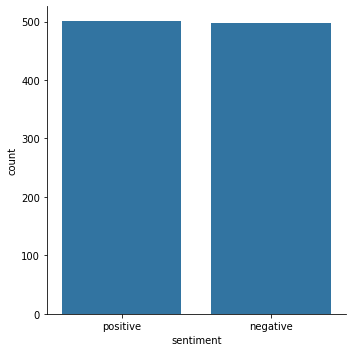

In [110]:
import seaborn as sns
sns.catplot(x ='sentiment', kind='count', data = df);

**Reduce the records from 50K to 1K for quick processing**

In [111]:
# save 1000 rows in a new dataframe
temp_df = df.iloc[0:1000,:]
temp_df.shape

(999, 2)

In [112]:
# check out the count of positive and negative reviews
temp_df['sentiment'].value_counts()

positive    501
negative    498
Name: sentiment, dtype: int64

In [113]:
# save the dataframe to a new csv file
temp_df.to_csv('datasets/imdb-dataset-1000.csv', index=False)

## b. Case folding, removing digits, punctuations and substituting contractions

**Read the Dataset:**

In [114]:
import pandas as pd
df = pd.read_csv("./datasets/imdb-dataset-1000.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
994,"On watching this film, I was amazed at how med...",positive
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative


In [115]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [116]:
import re
import string
import contractions
from textblob import TextBlob

def text_cleaning(mystr):
    mystr = mystr.lower()     # case folding
    mystr = re.sub('\w*\d\w*', '', mystr) # removing digits
    mystr = re.sub('\n', ' ', mystr)      # replace new line characters with space
    mystr = re.sub('[‘’“”…]', '', mystr) # removing double quotes and single quotes
    mystr = re.sub('<.*?>', '', mystr)   # removing html tags 
    mystr = re.sub('https?://\S+|www.\.\S+', '', mystr) # removing URLs
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # remove punctuations
    mystr = ' '.join([contractions.fix(word) for word in mystr.split()]) # expand contractions
    return mystr

In [117]:
df['r_cleaned'] = df['review'].apply(text_cleaning)
df.head()

,review,sentiment,r_cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


## b. Tokenization

In [118]:
from nltk.tokenize import word_tokenize
df['r_tokenized'] = df['r_cleaned'].apply(lambda x: word_tokenize(x))
df.head()

,review,sentiment,r_cleaned,r_tokenized
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


## c. Remove Stop Words

In [119]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_text):
    new_words = [word for word in tokenized_text if word not in stop_words]
    return new_words

df['r_no_sw'] = df['r_tokenized'].apply(lambda token: remove_stopwords(token))
df.head()

,review,sentiment,r_cleaned,r_tokenized,r_no_sw
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


## d. Save the Pre-Processed Dataframe in a New CSV File

In [120]:
# join the tokens of pre-processed text
df['processed_reviews'] = df['r_no_sw'].apply(lambda x: ' '.join(x))

new_df = pd.concat([df['sentiment'], df['processed_reviews']], axis=1)

# save the resulting datafrrame to a new csv file
new_df.to_csv('datasets/processed_imdb_reviews.csv', index=False)
new_df.head()

,sentiment,processed_reviews
0,positive,one reviewers mentioned watching oz episode ho...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter matteis love time money visually stunni...
